# カテゴリカル変数の処理方法色々

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
df = pd.read_csv("data/penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Label Encoding

In [4]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
# デフォルトではnumpy arrayで返されるので、
# DataFrameで返されるように指定しておく
oe.set_output(transform="pandas")
df = oe.fit_transform(df)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,42.0,56.0,6.0,31.0,2.0
1,0.0,2.0,45.0,43.0,11.0,33.0,1.0
2,0.0,2.0,51.0,49.0,20.0,12.0,1.0
3,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,0.0,2.0,22.0,62.0,18.0,19.0,1.0
...,...,...,...,...,...,...,...
339,2.0,0.0,NaN,NaN,NaN,NaN,NaN
340,2.0,0.0,105.0,12.0,39.0,66.0,1.0
341,2.0,0.0,136.0,26.0,46.0,87.0,2.0
342,2.0,0.0,89.0,17.0,36.0,76.0,1.0


## one-hot encoding

In [5]:
# ダミー変数
df = pd.read_csv("data/penguins_size.csv")
df = pd.get_dummies(df, drop_first=True)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,1,0
3,NaN,NaN,NaN,NaN,0,0,0,1,0,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,0,1,0,0,0,0
340,46.8,14.3,215.0,4850.0,0,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,1,0,0,1,0


# Target Encoding

In [8]:
from category_encoders import TargetEncoder
df = sns.load_dataset("titanic")
df.dropna(inplace=True)

encoder = TargetEncoder()
encoder.fit(df, df["survived"])
encoder.transform(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0.931533,38.0,1,0,71.2833,0.737773,0.675159,0.950662,False,0.592011,0.737773,0.999989,False
3,1,1,0.931533,35.0,1,0,53.1000,0.643481,0.675159,0.950662,False,0.592011,0.643481,0.999989,False
6,0,1,0.436317,54.0,0,0,51.8625,0.643481,0.675159,0.391155,True,0.717867,0.643481,0.013409,True
10,1,3,0.931533,4.0,1,1,16.7000,0.643481,0.628538,0.732342,False,0.646289,0.643481,0.999989,False
11,1,1,0.931533,58.0,0,0,26.5500,0.643481,0.675159,0.950662,False,0.592011,0.643481,0.999989,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,0.931533,47.0,1,1,52.5542,0.643481,0.675159,0.950662,False,0.725425,0.643481,0.999989,False
872,0,1,0.436317,33.0,0,0,5.0000,0.643481,0.675159,0.391155,True,0.737957,0.643481,0.013409,True
879,1,1,0.931533,56.0,0,1,83.1583,0.737773,0.675159,0.950662,False,0.592011,0.737773,0.999989,False
887,1,1,0.931533,19.0,0,0,30.0000,0.643481,0.675159,0.950662,False,0.737957,0.643481,0.999989,True


### マルチクラスの場合のTarget Encoding

In [11]:
df = pd.read_csv("data/penguins_size.csv")
# sexに、"." という誤字が含まれるので、その部分を欠損値に変える
df.loc[df[df["sex"]=="."].index[0], "sex"] = np.nan

targets = df["species"].unique()

for target in targets:
    target_y = df["species"] == target
    encoder = TargetEncoder()
    df["encoded_island_"+target] = encoder.fit_transform(df["island"], target_y)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,encoded_island_Adelie,encoded_island_Chinstrap,encoded_island_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.978140,7.742061e-03,0.014118
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0.978140,7.742061e-03,0.014118
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0.978140,7.742061e-03,0.014118
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0.978140,7.742061e-03,0.014118
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0.978140,7.742061e-03,0.014118
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,0.261905,7.385705e-08,0.738095
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0.261905,7.385705e-08,0.738095
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0.261905,7.385705e-08,0.738095
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0.261905,7.385705e-08,0.738095


# target encoding と one-hot encoding 比較する
### target encoding
欠損値代入 => カテゴリカル変数のEncoding => 標準化 => モデル学習

In [28]:
# 比較するための結果を格納するdict
scores = {}

In [29]:
df = sns.load_dataset("titanic")
df.drop("alive", axis=1, inplace=True)
# df.dropna(inplace=True)

# adult_male と alone をカテゴリカル変数として扱うための処理
df[["adult_male", "alone"]] = df[["adult_male", "alone"]].astype("object")
X = df.drop("survived", axis=1)
y = df["survived"]

# 欠損値の代入
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
num_cols = X.select_dtypes(include=np.number).columns.to_list()

cat_imputer = SimpleImputer(strategy="most_frequent")
num_imputer = SimpleImputer(strategy="median")
ct = ColumnTransformer([("cat_imputer", cat_imputer, cat_cols), ("num_imputer", num_imputer, num_cols)], remainder="passthrough")
ct.set_output(transform="pandas")
ct.fit_transform(X)

# カテゴリカル変数の target encoding
encoder = TargetEncoder()
# encoder.fit(df, df["survived"])
# encoder.transform(df)
pipeline_te = Pipeline([
    ("ct", ct),
    ("encoder", TargetEncoder()),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
scores["target"] = cross_val_score(pipeline_te, X, y, cv=cv)


In [30]:
scores

{'target': array([0.83240223, 0.78089888, 0.82022472, 0.84831461, 0.83146067,
        0.79888268, 0.79775281, 0.89325843, 0.79213483, 0.83707865,
        0.82122905, 0.86516854, 0.79213483, 0.81460674, 0.81460674])}

### target encoding

In [34]:
# PipeLineに組み込むためのダミー変数生成クラスの自作--------------------
class GetDummies(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns = None
        
    def fit(self, X, y=None):
        self.columns = pd.get_dummies(X).columns
        return self
    
    def transform(self, X):
        X_new = pd.get_dummies(X)
        return X_new.reindex(columns=self.columns, fill_value=0)
    
    
    
pipeline_ohe = Pipeline([
    ("ct", ct),
    ("encoder", GetDummies()),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])
scores["onehot"] = cross_val_score(pipeline_ohe, X, y, cv=cv)

In [33]:
scores

{'target': array([0.83240223, 0.78089888, 0.82022472, 0.84831461, 0.83146067,
        0.79888268, 0.79775281, 0.89325843, 0.79213483, 0.83707865,
        0.82122905, 0.86516854, 0.79213483, 0.81460674, 0.81460674]),
 'ohe': array([0.83240223, 0.7752809 , 0.81460674, 0.84831461, 0.83146067,
        0.7877095 , 0.81460674, 0.87078652, 0.80337079, 0.81460674,
        0.80446927, 0.86516854, 0.78651685, 0.80898876, 0.8258427 ])}

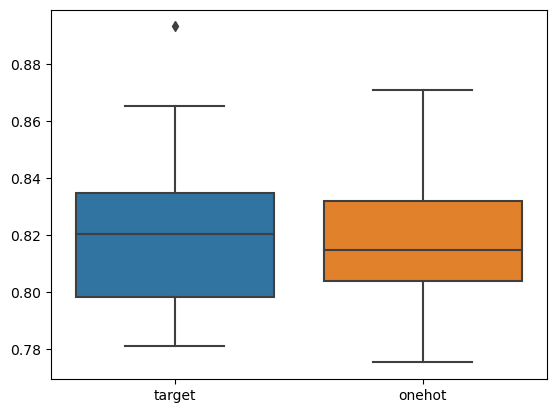

In [36]:
sns.boxplot(data=[scores["target"], scores["onehot"]])
plt.xticks([0, 1], ["target", "onehot"])
plt.show()

In [37]:
print(np.median(scores["target"]))
print(np.median(scores["onehot"]))

0.8202247191011236
0.8146067415730337
